# ****HEART DISEASE DETECTOR****

**This is a project that focuses on using patient personal information and medical data from a given dataset which includes whether they have heart disease or not, and then create a machine learning model that accurately predicts a new patient having a heart disease in the future or not.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\anike\Jupyter_Notebook\Heart Disease Detection project Sem 7\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 📝 Detailed Data Explanation

### 🎯 Target Variable

| Column Name | Value | Meaning |
| :--- | :--- | :--- |
| **HeartDisease** | **0** | No Heart Disease (Absence) |
| | **1** | Presence of Heart Disease |

### 🩺 Clinical and Categorical Features

| Column Name | Value | Meaning |
| :--- | :--- | :--- |
| **Sex** | **M** | Male |
| | **F** | Female |
| **ChestPain** | **ATA** | Atypical Angina |
| | **NAP** | Non-Anginal Pain |
| | **ASY** | Asymptomatic |
| | **TA** | Typical Angina |
| **FastingBS** | **0** | Fasting Blood Sugar $\le 120$ mg/dl |
| | **1** | Fasting Blood Sugar $> 120$ mg/dl |
| **RestingECG** | **Normal** | Normal electrocardiogram result |
| | **ST** | Having ST-T wave abnormality |
| | **LVH** | Showing probable or definite left ventricular hypertrophy |
| **ExerciseAngina**| **N** | No exercise-induced angina |
| | **Y** | Yes, exercise-induced angina |
| **ST\_Slope** | **Up** | Upsloping: exercise ST segment is upsloping |
| | **Flat** | Flat: exercise ST segment is flat |
| | **Down** | Downsloping: exercise ST segment is downsloping |

***


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## EDA for numeric data

The describe method helps us in understanding the distribution of the numeric columns in our dataset. Some things to look out for are : 
- Columns like blood pressure or cholestrol cant be 0 so minimum value 0 needs to be checked out.
- Check the difference between mean and median(50%) values. If they are very different then that means data is skewed.
- This also helps us in checking for outliers.

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## EDA for categorical and boolean data

Categorical columns can be explored using graphs and plots.
Eg : Here countplots tells us the number of records for each value of a feature.

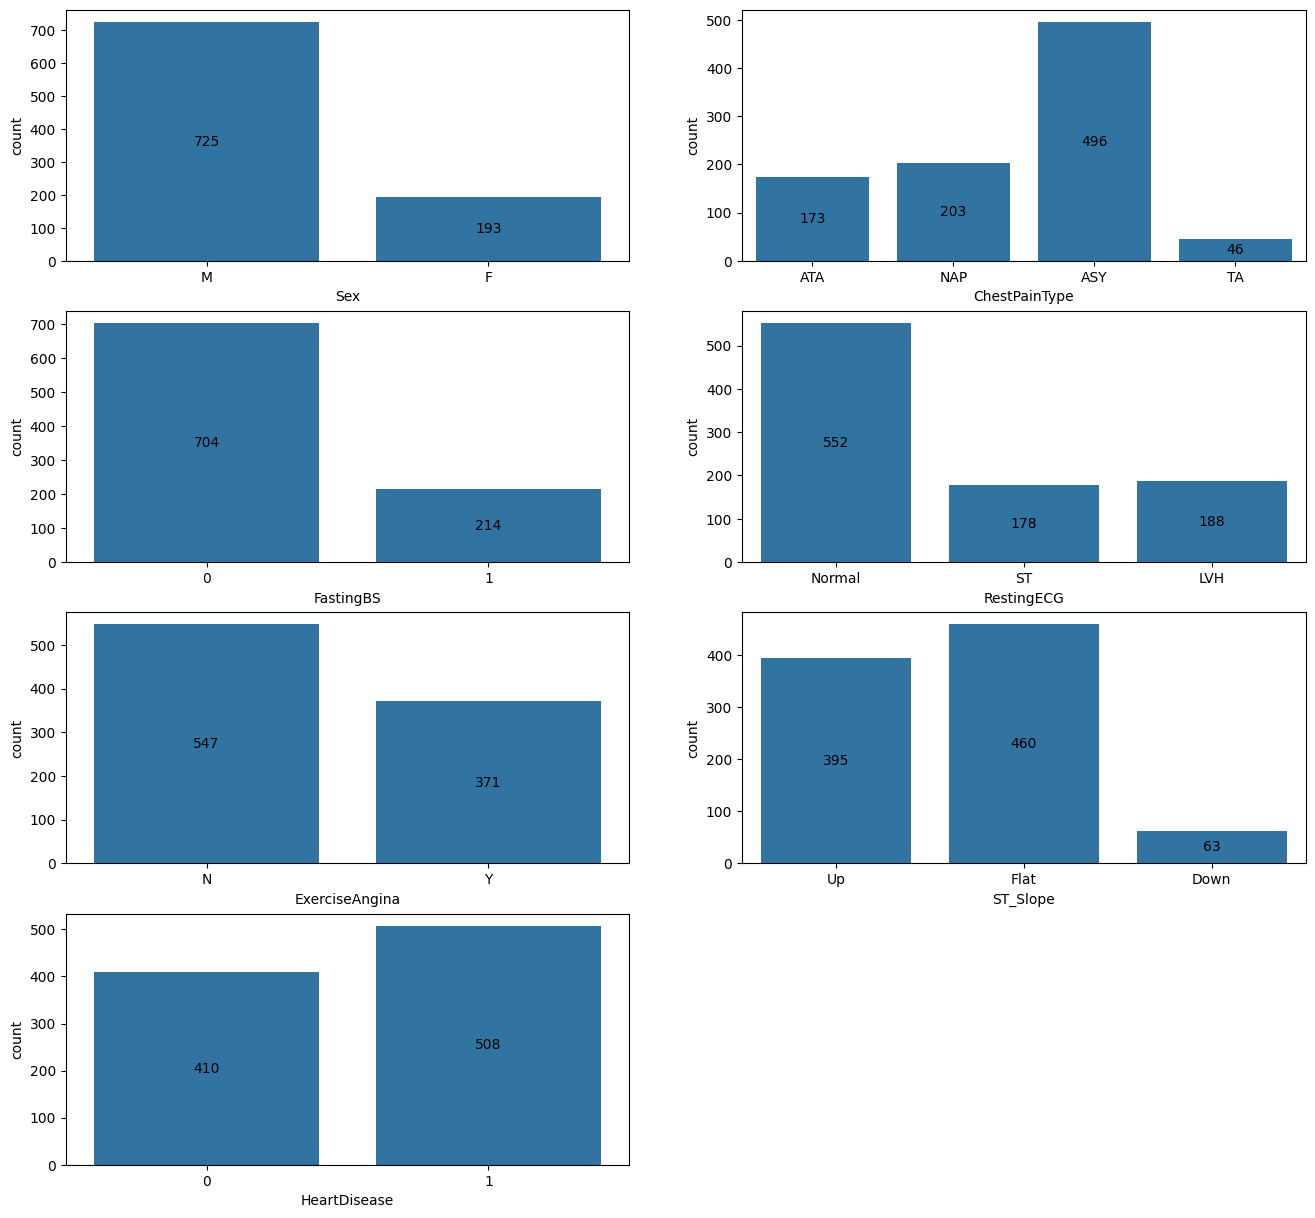

In [5]:
categorical_cols = [
    "Sex",
    "ChestPainType",
    "FastingBS",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
    "HeartDisease"
]

fig = plt.figure(figsize=(16,15))
for idx,col in enumerate(categorical_cols):
    ax = plt.subplot(4,2,idx+1)
    sns.countplot(x=df[col],ax=ax)
    for x in ax.containers:
        ax.bar_label(x,label_type="center")

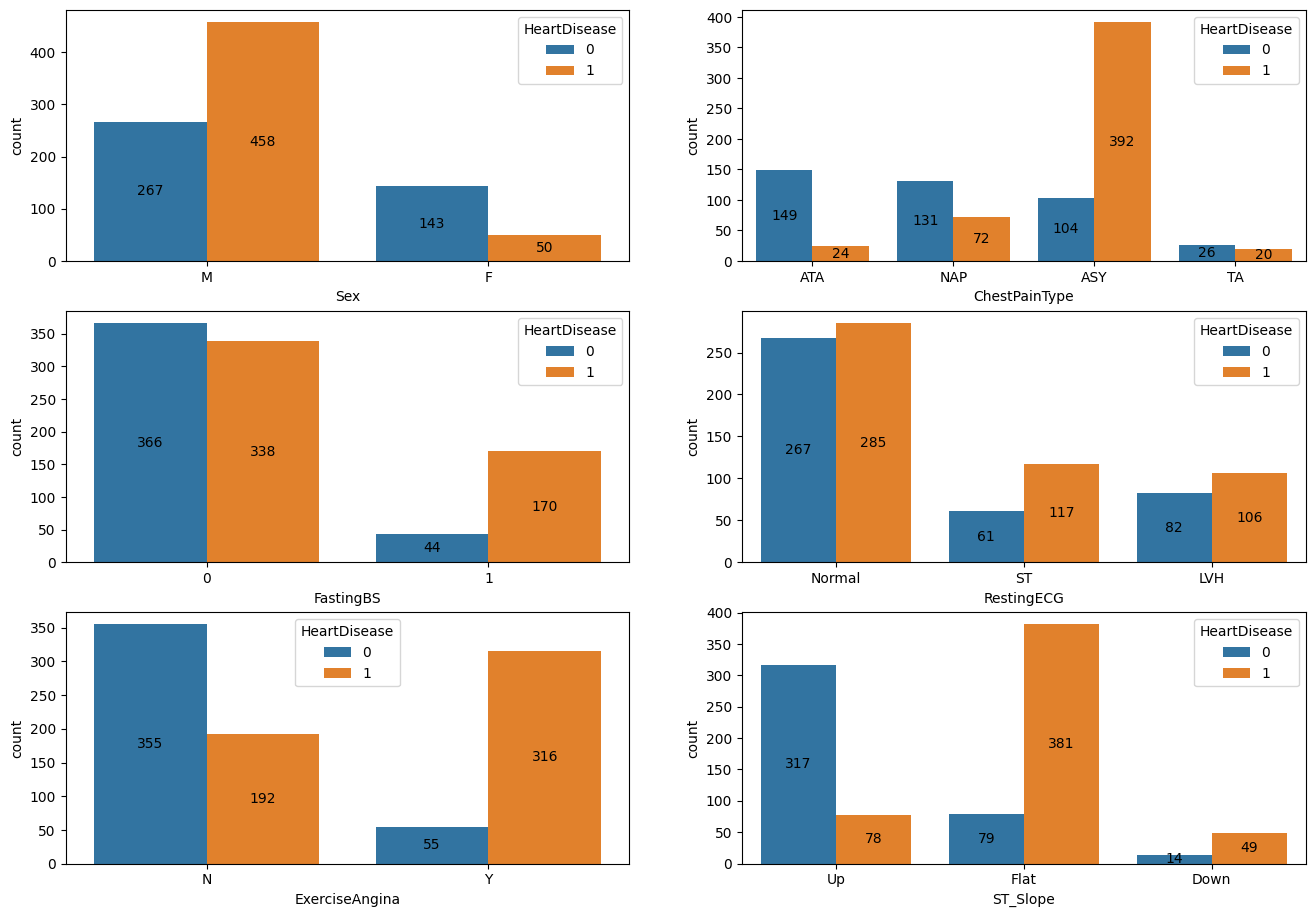

In [6]:
fig = plt.figure(figsize=(16,15))
for idx,col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4,2,idx+1)
    sns.countplot(x=df[col],hue=df["HeartDisease"],ax=ax)
    for x in ax.containers:
        ax.bar_label(x,label_type="center")

## DATA CLEANING

In [7]:
df[df["RestingBP"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes


In [8]:
df[df["Cholesterol"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


In [9]:
cleandf=df[df["RestingBP"]!=0]
cleandf[cleandf["RestingBP"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             0 non-null      int64  
 1   Sex             0 non-null      object 
 2   ChestPainType   0 non-null      object 
 3   RestingBP       0 non-null      int64  
 4   Cholesterol     0 non-null      int64  
 5   FastingBS       0 non-null      int64  
 6   RestingECG      0 non-null      object 
 7   MaxHR           0 non-null      int64  
 8   ExerciseAngina  0 non-null      object 
 9   Oldpeak         0 non-null      float64
 10  ST_Slope        0 non-null      object 
 11  HeartDisease    0 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 0.0+ bytes


#### Cleaning Cholesterol Column
Cholesterol column is being cleaned by imputing with median values according to group havng heart disease and not having heart disease.

**Groupwise imputation can be done in two ways as shown below. One with cleandf and one with testdf.**

Another interesting thing to note is that the new cleaned data has a mean closer to the median of the column as it should be.

In [10]:
testdf=cleandf.copy()
cholesterol_without_hd=cleandf.loc[cleandf["HeartDisease"]==0,"Cholesterol"]
cholesterol_with_hd=cleandf.loc[cleandf["HeartDisease"]==1,"Cholesterol"]
cleandf.loc[cleandf["HeartDisease"]==0,"Cholesterol"]=cholesterol_without_hd.replace(to_replace=0,value=cholesterol_without_hd.median())
cleandf.loc[cleandf["HeartDisease"]==1,"Cholesterol"]=cholesterol_with_hd.replace(to_replace=0,value=cholesterol_with_hd.median())

testdf["Cholesterol"]=testdf["Cholesterol"].replace(0,pd.NA).fillna(testdf.groupby("HeartDisease")["Cholesterol"].transform("median"))

print("Original Dataset : Mean of Cholesterol = ",df["Cholesterol"].mean())
print("Clean Dataset 1 : Mean of Cholesterol = ",cleandf["Cholesterol"].mean())
print("Clean Dataset 2 : Mean of Cholesterol = ",testdf["Cholesterol"].mean())

Original Dataset : Mean of Cholesterol =  198.7995642701525
Clean Dataset 1 : Mean of Cholesterol =  239.7001090512541
Clean Dataset 2 : Mean of Cholesterol =  239.7001090512541


C:\Users\anike\AppData\Local\Temp\ipykernel_22160\4098555989.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testdf["Cholesterol"]=testdf["Cholesterol"].replace(0,pd.NA).fillna(testdf.groupby("HeartDisease")["Cholesterol"].transform("median"))


In [11]:
cleandf[["RestingBP","Cholesterol"]].describe()

,RestingBP,Cholesterol
count,917.000000,917.000000
mean,132.540894,239.700109
std,17.999749,54.352727
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


In [12]:
cleandf=pd.get_dummies(cleandf,drop_first=True)
cleandf.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


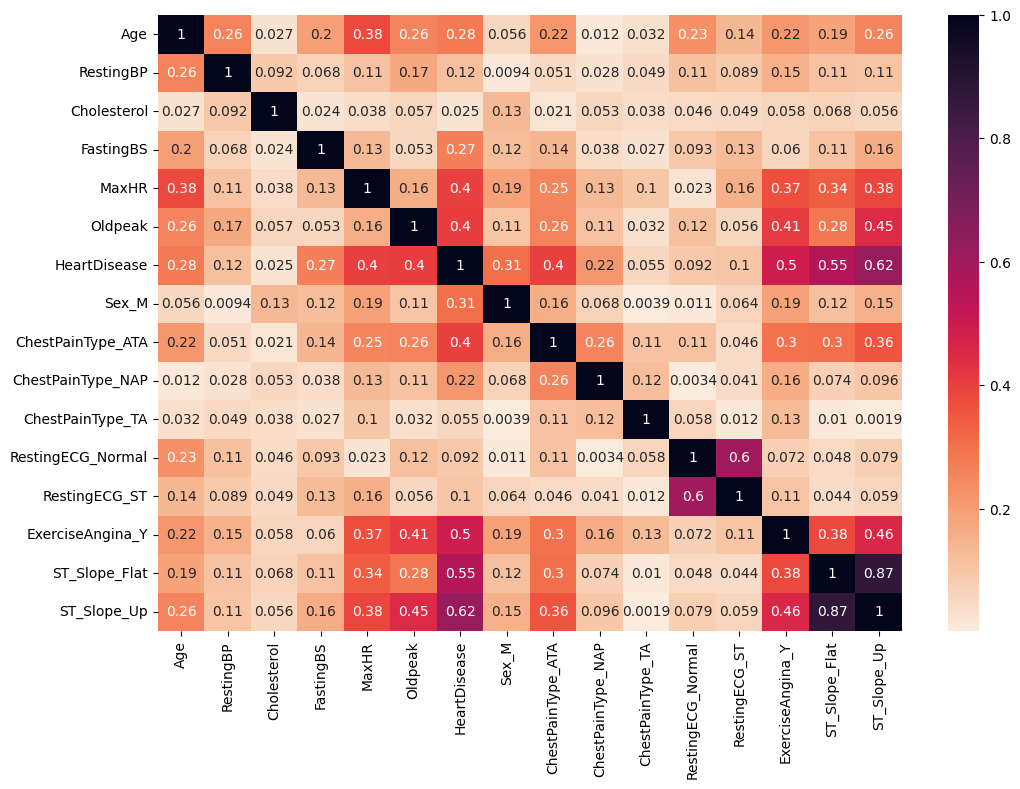

In [13]:
correlation=abs(cleandf.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap="rocket_r")
plt.show()

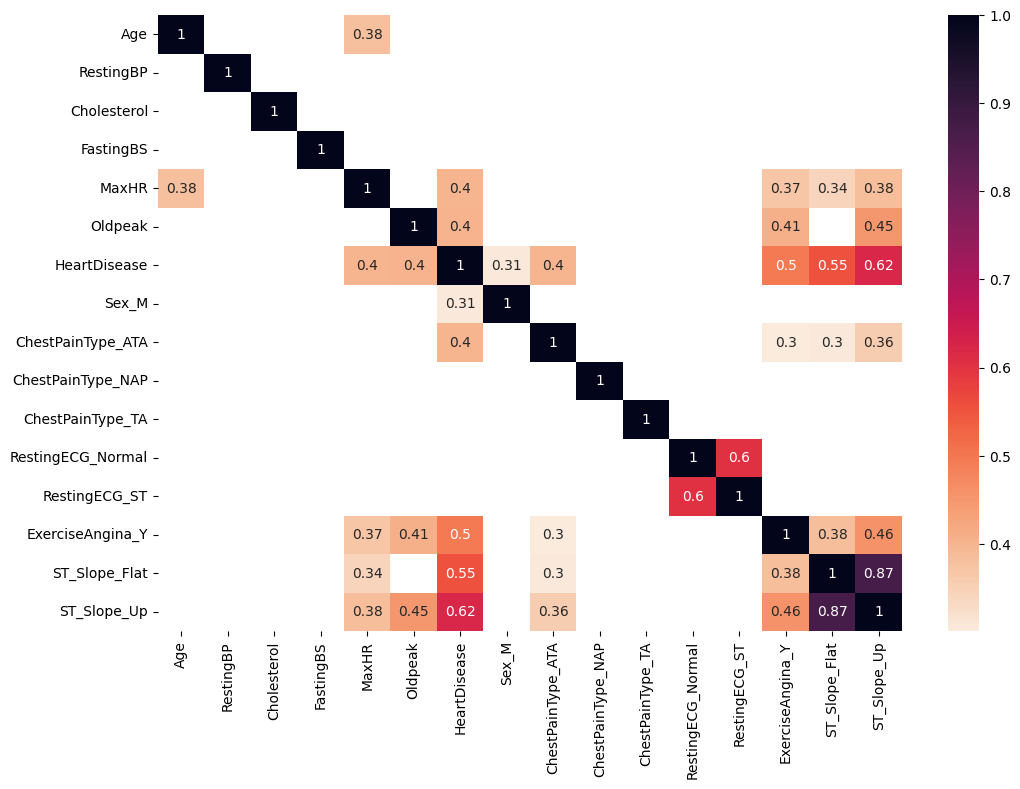

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation[correlation>0.30], annot=True, cmap="rocket_r")
plt.show()

In [15]:
X = cleandf.drop(["HeartDisease"],axis=1)
y = cleandf["HeartDisease"]

X_train,X_val,y_train,y_val = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=417,
    stratify=X["Sex_M"]
)

features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ChestPainType_ATA",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

for x in features:
    knn=KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[x]],y_train)
    accuracy=knn.score(X_val[[x]],y_val)
    print(f"KNN Classifier trained on {x} has accuracy of {accuracy}")

KNN Classifier trained on MaxHR has accuracy of 0.6014492753623188
KNN Classifier trained on Oldpeak has accuracy of 0.5144927536231884
KNN Classifier trained on Sex_M has accuracy of 0.5869565217391305
KNN Classifier trained on ChestPainType_ATA has accuracy of 0.6376811594202898
KNN Classifier trained on ExerciseAngina_Y has accuracy of 0.7681159420289855
KNN Classifier trained on ST_Slope_Flat has accuracy of 0.5072463768115942
KNN Classifier trained on ST_Slope_Up has accuracy of 0.5072463768115942


In [16]:
scaler = MinMaxScaler()
X_trainsc=scaler.fit_transform(X_train[features])
X_valsc=scaler.transform(X_val[features])
print("Scaled data : ")
print(X_trainsc)
print()
print("Notice that columns like MaxHR now have values less than one and in decimals !")
print()

knnunscaled=KNeighborsClassifier(n_neighbors=3)
knn=KNeighborsClassifier(n_neighbors=3)
knnunscaled.fit(X_train[features],y_train)
knn.fit(X_trainsc,y_train)
accuracyunscaled=knnunscaled.score(X_val[features],y_val)
accuracy=knn.score(X_valsc,y_val)
print(f"Unscaled Accuracy : {accuracyunscaled*100:.2f} %")
print(f"Scaled Accuracy : {accuracy*100:.2f} %")

Scaled data : 
[[0.3028169  0.47727273 1.         ... 1.         0.         0.        ]
 [0.42253521 0.40909091 1.         ... 1.         0.         1.        ]
 [0.90140845 0.29545455 1.         ... 0.         0.         1.        ]
 ...
 [0.69014085 0.36363636 1.         ... 0.         0.         1.        ]
 [0.6971831  0.46590909 1.         ... 1.         0.         1.        ]
 [0.78169014 0.29545455 1.         ... 0.         0.         1.        ]]

Notice that columns like MaxHR now have values less than one and in decimals !

Unscaled Accuracy : 77.54 %
Scaled Accuracy : 81.88 %


## Hyperparameter Tuning

It is important in case of KNN that we dont choose even number for n_neighbors because that might have the possibility of the groups being split exactly k/2. We should prefer odd numbers for k.

In [17]:
param_grid = {
    "n_neighbors" : range(1,21),
    "metric" : ['euclidean', 'manhattan', 'chebyshev']
}
knn=KNeighborsClassifier()
gridsearch=GridSearchCV(knn,param_grid=param_grid,cv=5,scoring="accuracy")
gridsearch.fit(X_trainsc,y_train)
print("Best Parameters for KNN : ")
print(gridsearch.best_params_)
print("Best Score for KNN using best parameters : ")
print(f"{gridsearch.best_score_*100:.2f} %")

Best Parameters for KNN : 
{'metric': 'manhattan', 'n_neighbors': 17}
Best Score for KNN using best parameters : 
84.46


## Final Model

In [18]:
best_knn = gridsearch.best_estimator_
predictions = best_knn.predict(X_valsc)
accuracy = accuracy_score(y_val,predictions)
print(f"Final Model Accuracy on Validation with best parameters : {accuracy*100:.2f} %")

Final Model Accuracy on Validation with best parameters : 87.68


### Important Points

- Our testing accuracy was a little better than our training accuracy in which case it is good to check if the distribution of records is similar in the dataset, the train set and the validation set.
- It is important to ensure that you are using the scaler trained on training data to scale the testing data. If we use fit_transform while scaling testing data instead of using just transform, it may lead to data leakage.

In [19]:
print("Distribution of patients by their sex in the entire dataset")
countmain = X.Sex_M.value_counts()
print(countmain)
print(f"Ratio : {countmain.iloc[0]/countmain.iloc[1]:.2f}")


print("\nDistribution of patients by their sex in the training dataset")
counttrain = X_train.Sex_M.value_counts()
print(counttrain)
print(f"Ratio : {counttrain.iloc[0]/countmain.iloc[1]:.2f}")

print("\nDistribution of patients by their sex in the test dataset")
countval = X_val.Sex_M.value_counts()
print(countval)
print(f"Ratio : {countval.iloc[0]/countval.iloc[1]:.2f}")

Distribution of patients by their sex in the entire dataset
Sex_M
True     724
False    193
Name: count, dtype: int64
Ratio : 3.75

Distribution of patients by their sex in the training dataset
Sex_M
True     615
False    164
Name: count, dtype: int64
Ratio : 3.19

Distribution of patients by their sex in the test dataset
Sex_M
True     109
False     29
Name: count, dtype: int64
Ratio : 3.76


### Important Points

- By doing the above process, it was noticed that the train set did not have the same distribution so I introduced stratified sampling on the feature *Sex_M* which helped in improving the final accuracy from 83.3 to 84.06. We can look through distribution of other variables to make a better and more generalized model.
- We can also focus on using some ways to equalized the male-female ratio in the dataset using sampling methods.


## Final Report of Model

In [20]:
classnames = ["No Heart Disease","Heart Disease"]
print("Classification Report KNN : \n")
print(
    classification_report(
        y_true=y_val,
        y_pred=predictions,
        target_names=classnames,
        digits=3
    )
)

Classification Report KNN : 

                  precision    recall  f1-score   support

No Heart Disease      0.932     0.809     0.866        68
   Heart Disease      0.835     0.943     0.886        70

        accuracy                          0.877       138
       macro avg      0.884     0.876     0.876       138
    weighted avg      0.883     0.877     0.876       138



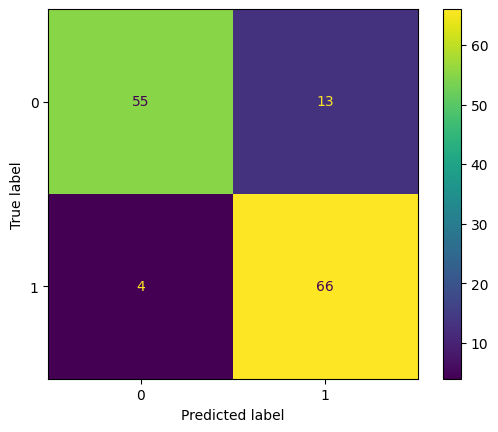

In [21]:
cf = confusion_matrix(y_val,predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()

### Future Work 
- Include More Models
- Try handling the gender distribution difference.
- Try ensemble models

## Project 2.0
**AIM**
- Add Logistic Regression, SVM, NaiveBayes, RandomForest, GradientBoosting
- Take best 3-4 models and apply Ensemble Learning

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

### Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_trainsc,y_train)
acc = lr.score(X_valsc,y_val)
print(f"Accuracy : {acc*100:.2f} %")

Accuracy : 86.96 %


In [44]:
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["liblinear", "saga"],
    "max_iter": [200, 500]
}
param_grid_2 = {
    "penalty": ["elasticnet"],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    "solver": ["saga"],
    "l1_ratio": [0.0, 0.25, 0.5, 0.75, 1.0], 
    "max_iter": [200, 500] 
}
param_grid = [param_grid_1, param_grid_2]

gridsearch = GridSearchCV(lr,param_grid=param_grid,cv=5,scoring="accuracy")
gridsearch.fit(X_trainsc,y_train)
print("Best Parameters for Logistic Regression : ")
print(gridsearch.best_params_)
print("Best Grid Search score : ",end='')
print(f"{gridsearch.best_score_*100:.2f} %")
best_lr = gridsearch.best_estimator_
print("Best Estimator accuracy : ",f"{(best_lr.score(X_valsc,y_val))*100:.2f} %")

Best Parameters for Logistic Regression : 
{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best Grid Search score : 83.82 %
Best Estimator accuracy :  86.96 %


### SVM

In [77]:
svm = SVC(probability = True)
svm.fit(X_trainsc,y_train)
acc = svm.score(X_valsc,y_val)
print(f"Accuracy : {acc*100:.2f} %")

Accuracy : 87.68 %


In [79]:
param_grid = [
    {
        "kernel": ["linear"],
        "C": [0.01, 0.1, 1, 10, 100],
        "class_weight": [None, "balanced"]
    },

    {
        "kernel": ["rbf"],
        "C": [0.01, 0.1, 1, 10, 100],
        "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],
        "class_weight": [None, "balanced"]
    }
]
gridsearch = GridSearchCV(svm,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_trainsc,y_train)
print("Best Parameters for Support Vector Classifier : ")
print(gridsearch.best_params_)
print("Best Grid Search score : ",end='')
print(f"{gridsearch.best_score_*100:.2f} %")
best_svm = gridsearch.best_estimator_
print("Best Estimator accuracy : ",f"{(best_svm.score(X_valsc,y_val))*100:.2f} %")

Best Parameters for Support Vector Classifier : 
{'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}
Best Grid Search score : 83.82 %
Best Estimator accuracy :  87.68 %


### Random Forest

In [54]:
rf = RandomForestClassifier(random_state=40)
rf.fit(X_trainsc,y_train)
acc = rf.score(X_valsc,y_val)
print(f"Accuracy : {acc*100:.2f} %")

Accuracy : 81.16 %


In [56]:
# param_grid = {
#     "n_estimators": [100, 200, 300, 500, 800, 1000],

#     "max_depth": [None, 5, 10, 20, 30, 50],

#     "min_samples_split": [2, 5, 10, 20],

#     "min_samples_leaf": [1, 2, 5, 10],

#     "max_features": ["sqrt", "log2", None, 0.3, 0.5, 0.7],

#     "bootstrap": [True, False],

#     "criterion": ["gini", "entropy", "log_loss"],

#     "class_weight": [None, "balanced", "balanced_subsample"]
# }
param_grid = {
    "n_estimators": [150, 200, 250],
    "max_depth": [None, 5, 40, 50],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [4, 5, 7, 10],
    "max_features": ["log2", 0.3, 0.7, 0.5],
    "bootstrap": [True, False],
    "class_weight": ["balanced", "balanced_subsample"]
}

gridsearch = GridSearchCV(rf,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_trainsc,y_train)
print("Best Parameters for Random Forest Classifier : ")
print(gridsearch.best_params_)
print("Best Grid Search score : ",end='')
print(f"{gridsearch.best_score_*100:.2f} %")
best_rf = gridsearch.best_estimator_
print("Best Estimator accuracy : ",f"{(best_rf.score(X_valsc,y_val))*100:.2f} %")

Best Parameters for Random Forest Classifier : 
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Grid Search score : 84.59 %
Best Estimator accuracy :  87.68 %


### XGBoost

In [59]:
xgb = XGBClassifier(eval_metric="logloss",random_state=40)
# xgb = XGBClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=6,
#     subsample=1.0,
#     colsample_bytree=1.0,
#     objective="binary:logistic",
#     eval_metric="logloss",
#     random_state=42
# )
xgb.fit(X_trainsc,y_train)
acc = xgb.score(X_valsc,y_val)
print(f"Accuracy : {acc*100:.2f} %")

Accuracy : 82.61 %


In [61]:
param_grid = {
    "eval_metric": ['logloss','error','auc','aucpr'],
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 0.1, 0.3],
    "reg_alpha": [0, 0.1, 1],   # L1 regularization
    "reg_lambda": [1, 5, 10]    # L2 regularization
}
xgb = XGBClassifier(random_state=40)
gridsearch = GridSearchCV(xgb,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_trainsc,y_train)
print("Best Parameters for XGBoost : ")
print(gridsearch.best_params_)
print("Best Grid Search score : ",end='')
print(f"{gridsearch.best_score_*100:.2f} %")
best_xgb = gridsearch.best_estimator_
print("Best Estimator accuracy : ",f"{(best_xgb.score(X_valsc,y_val))*100:.2f} %")

Best Parameters for XGBoost : 
{'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.8}
Best Grid Search score : 85.75 %
Best Estimator accuracy :  86.96 %


### Gaussian Naive Bayes

In [62]:
nb = GaussianNB()
nb.fit(X_trainsc,y_train)
acc = nb.score(X_valsc,y_val)
print(f"Accuracy : {acc*100:.2f} %")

Accuracy : 85.51 %


In [65]:
param_grid = {
    "var_smoothing": [
        1e-12, 1e-11, 1e-10, 1e-9,
        1e-8,  1e-7,  1e-6,  1e-5
    ],
    "priors": [
        None,
        [0.5, 0.5],
        [0.6, 0.4],
        [0.7, 0.3],
        [0.4, 0.6]
    ]
}
gridsearch = GridSearchCV(nb,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_trainsc,y_train)
print("Best Parameters for Gaussian Naive Bayes : ")
print(gridsearch.best_params_)
print("Best Grid Search score : ",end='')
print(f"{gridsearch.best_score_*100:.2f} %")
best_nb = gridsearch.best_estimator_
print("Best Estimator accuracy : ",f"{(best_nb.score(X_valsc,y_val))*100:.2f} %")

Best Parameters for Gaussian Naive Bayes : 
{'priors': [0.6, 0.4], 'var_smoothing': 1e-12}
Best Grid Search score : 83.56 %
Best Estimator accuracy :  86.23 %


### Light GBM Classifier

In [66]:
lgbm = LGBMClassifier()
lgbm.fit(X_trainsc,y_train)
acc = lgbm.score(X_valsc,y_val)
print(f"Accuracy : {acc*100:.2f} %")

[LightGBM] [Info] Number of positive: 437, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 779, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560976 -> initscore=0.245122
[LightGBM] [Info] Start training from score 0.245122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\ProgramData\anaconda3\envs\ml-dl\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [67]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [15, 31],
    "max_depth": [3, 5, -1],
    "min_child_samples": [10, 20, 50],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
gridsearch = GridSearchCV(lgbm,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_trainsc,y_train)
print("Best Parameters for Gaussian Naive Bayes : ")
print(gridsearch.best_params_)
print("Best Grid Search score : ",end='')
print(f"{gridsearch.best_score_*100:.2f} %")
best_lgbm = gridsearch.best_estimator_
print("Best Estimator accuracy : ",f"{(best_lgbm.score(X_valsc,y_val))*100:.2f} %")

[LightGBM] [Info] Number of positive: 437, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 779, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560976 -> initscore=0.245122
[LightGBM] [Info] Start training from score 0.245122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\ProgramData\anaconda3\envs\ml-dl\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## CONFUSION MATRICES

C:\ProgramData\anaconda3\envs\ml-dl\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


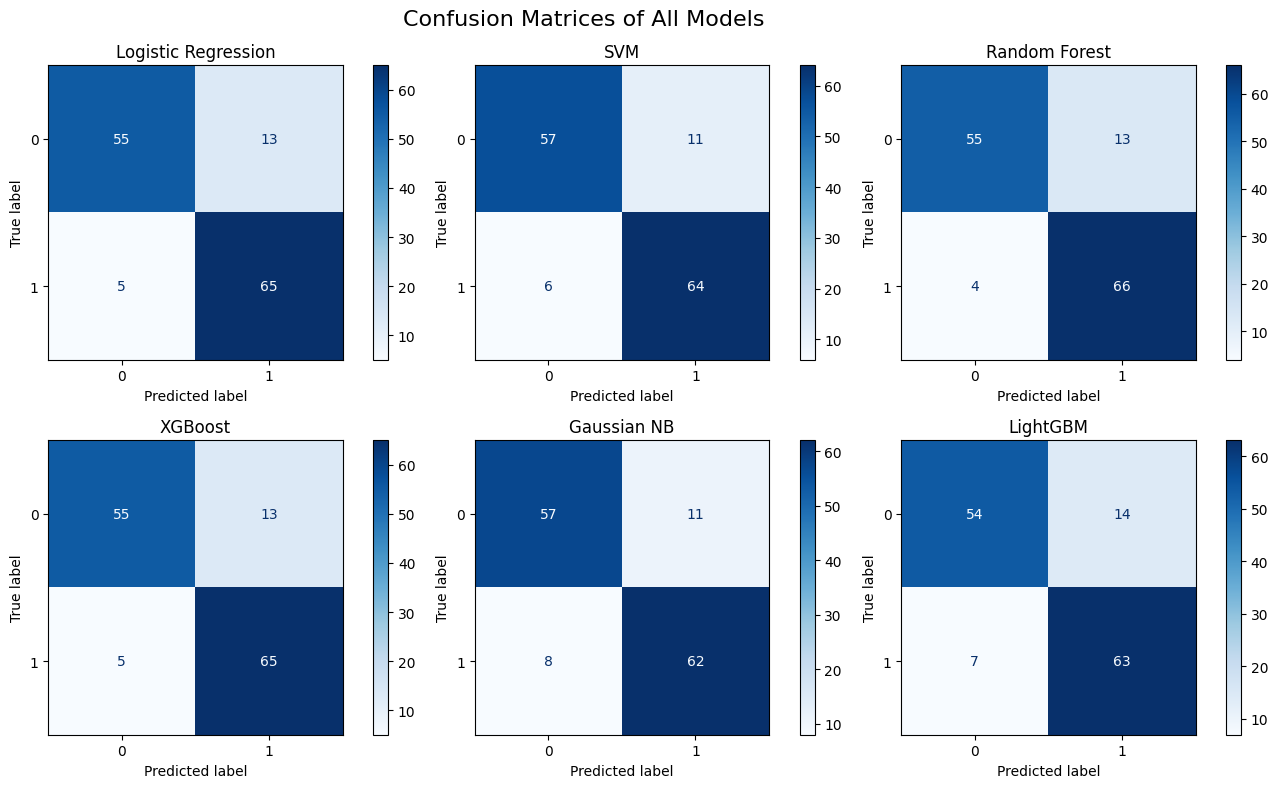

In [76]:
models = {
    "Logistic Regression": best_lr,
    "SVM": best_svm,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Gaussian NB": best_nb,
    "LightGBM": best_lgbm
}

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_valsc,
        y_val,
        ax=ax,
        cmap="Blues",
        values_format="d"
    )
    ax.set_title(name)

# Remove empty subplot if models < grid size
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=10)
plt.suptitle("Confusion Matrices of All Models", fontsize=16)
plt.tight_layout()
plt.show()


## ENSEMBLE MODEL MERGING ALL TRAINED MODELS

In [81]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm),
        ('rf', best_rf),
        ('lgbm', best_lgbm),
        ('knn', best_knn),
        ('nb', best_nb)
    ],
    voting='soft'
)
ensemble.fit(X_trainsc, y_train)
y_pred = ensemble.predict(X_valsc)
acc = accuracy_score(y_val, y_pred)

print(f"Soft Voting Ensemble Accuracy: {acc*100:.2f}%")

[LightGBM] [Info] Number of positive: 437, number of negative: 342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 779, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560976 -> initscore=0.245122
[LightGBM] [Info] Start training from score 0.245122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\ProgramData\anaconda3\envs\ml-dl\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


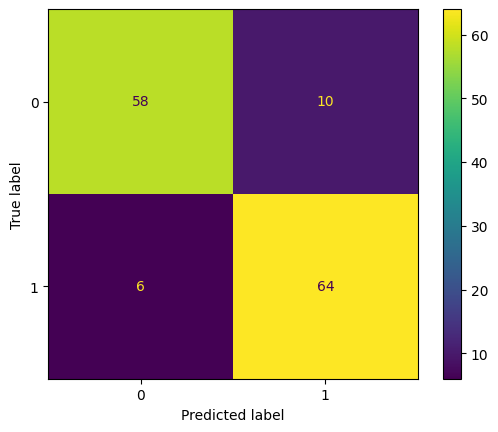

In [82]:
cf = confusion_matrix(y_val,y_pred)
ConfusionMatrixDisplay(cf).plot()
plt.show()

In [83]:
classnames = ["No Heart Disease","Heart Disease"]
print("Classification Report Ensemble : \n")
print(
    classification_report(
        y_true=y_val,
        y_pred=y_pred,
        target_names=classnames,
        digits=3
    )
)

Classification Report Ensemble : 

                  precision    recall  f1-score   support

No Heart Disease      0.906     0.853     0.879        68
   Heart Disease      0.865     0.914     0.889        70

        accuracy                          0.884       138
       macro avg      0.886     0.884     0.884       138
    weighted avg      0.885     0.884     0.884       138

